In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
url_train_x = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
dataset_path = tf.keras.utils.get_file("har_dataset.zip", url_train_x, extract=True)

data_dir = dataset_path.replace("har_dataset.zip", "datasets/har/UCI HAR Dataset/")

In [ ]:
x_train = pd.read_csv(data_dir + "/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv(data_dir + "/UCI HAR Dataset/train/y_train.txt", header=None)
x_test = pd.read_csv(data_dir + "/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv(data_dir + "/UCI HAR Dataset/test/y_test.txt", header=None)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train.values.ravel())
y_test = label_encoder.transform(y_test.values.ravel())

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])


<ipython-input-7-197799a833c9>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_train = pd.read_csv(data_dir + "/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-7-197799a833c9>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_test = pd.read_csv(data_dir + "/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, x_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/40
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7076 - loss: 0.8264 - val_accuracy: 0.9260 - val_loss: 0.1983
Epoch 2/40
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9592 - loss: 0.1014 - val_accuracy: 0.9342 - val_loss: 0.2197
Epoch 3/40
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9724 - loss: 0.0755 - val_accuracy: 0.9243 - val_loss: 0.2267
Epoch 4/40
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9717 - loss: 0.0743 - val_accuracy: 0.9260 - val_loss: 0.2720
Epoch 5/40
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9772 - loss: 0.0582 - val_accuracy: 0.9382 - val_loss: 0.1978
Epoch 6/40
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9803 - loss: 0.0542 - val_accuracy: 0.9369 - val_loss: 0.2333
Epoch 7/40
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9823 - loss: 0.0516 - val_accuracy: 0.9423 - val_loss: 0.1959
Epoch 8/40
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9818 - loss: 0.0524 - val_accuracy: 0

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


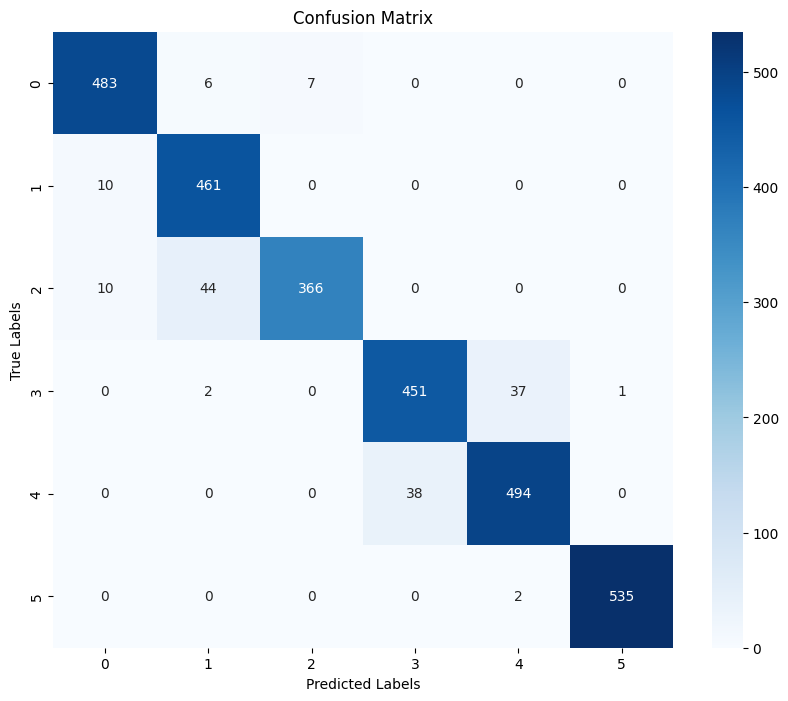

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()